[[ -12. -100.]
 [   1.    0.]] [[1.]
 [0.]] [[  0. 100.]] [[0.]]


C:\Users\claud\AppData\Local\Temp\ipykernel_39832\101103634.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(beta)


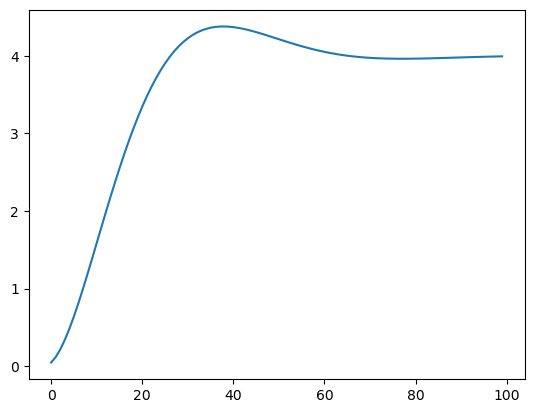

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import cont2discrete, tf2ss

zeta = 0.6
omega_n = 10

# Transfer function coefficients
num = [omega_n**2]
den = [1, 2*zeta*omega_n, omega_n**2]

# Convert TF → State-space
A, B, C, D = tf2ss(num, den)

Ts = 0.01  # sample time

# Now discretize the state-space system
Ad, Bd, Cd, Dd, dt = cont2discrete((A, B, C, D), Ts, method='bilinear')

print(A, B, C, D)
# Initial state
x = np.zeros((2, 1))

def pitch_update(beta_ref):
    global x

    x = Ad @ x + Bd * beta_ref

    beta = Cd @ x + Dd * beta_ref
    return float(beta)

beta_values = []
for k in range(100):
    beta = pitch_update(beta_ref=4.0)   # command pitch = 5 degrees
    beta_values.append(beta)

plt.plot(beta_values)

In [5]:
print(Ad, Bd, Cd, Dd)

[[ 0.88235294 -0.94117647]
 [ 0.00941176  0.99529412]] [[9.41176471e-03]
 [4.70588235e-05]] [[ 0.47058824 99.76470588]] [[0.00235294]]


In [14]:
path = r'TSRxCPxPSI.csv'
df = pd.read_csv(path)
df

,TSR,-5,-4,-3,-2,-1,0,1,2,3,4,5
0,0.411942,0.0007,0.0010,0.0013,0.0015,0.0018,0.0021,0.0023,0.0026,0.0028,0.0031,0.0033
1,0.439404,0.0008,0.0011,0.0014,0.0016,0.0019,0.0022,0.0025,0.0027,0.0030,0.0033,0.0035
2,0.470790,0.0009,0.0012,0.0015,0.0018,0.0021,0.0024,0.0027,0.0030,0.0032,0.0035,0.0038
3,0.507005,0.0009,0.0013,0.0016,0.0019,0.0022,0.0026,0.0029,0.0032,0.0035,0.0038,0.0041
4,0.549255,0.0010,0.0014,0.0017,0.0021,0.0024,0.0028,0.0032,0.0035,0.0038,0.0042,0.0045
...,...,...,...,...,...,...,...,...,...,...,...,...
191,23.068729,-0.5313,-0.5180,-0.5276,-0.5396,-0.5539,-0.5790,-0.6162,-0.6788,-0.8500,-1.1788,-1.7242
192,24.167240,-0.6381,-0.6257,-0.6392,-0.6585,-0.6841,-0.7269,-0.7918,-0.8824,-1.0819,-1.4697,-2.1104
193,26.364261,-0.8841,-0.8743,-0.8973,-0.9319,-0.9832,-1.0642,-1.1895,-1.3443,-1.6264,-2.1537,-3.0514
194,28.561283,-1.1772,-1.1713,-1.2051,-1.2564,-1.3369,-1.4665,-1.6582,-1.9132,-2.2992,-3.0409,-4.1698


In [ ]:
path = r'TSRxCPxPSI.csv'
df = pd.read_csv(path)
angles = np.arange(-5,6,1)
TSR = df.iloc[:,0]

def Cp_calc(LAMBDA=0, PHI=0):
    path = r'TSRxCPxPSI.csv'
    df = pd.read_csv(path)
    angles = np.arange(-5,6,1)
    TSR = df.iloc[:,0]
    diff1 = np.abs(TSR - LAMBDA)
    diff2 = np.abs(angles - PHI)
    id1 = np.argmin(diff1)
    id2 = np.argmin(diff2)+1

    return df.iloc[id1,id2]

Cp_calc(LAMBDA=7.6, PHI=1)

0.4796

In [8]:
import control as ct

w = 11.11
z =0.6
num= [w**2]
den = [1,2*z*w,w**2]

pitch_tf = ct.tf(num, den)
pitch = pitch_tf.to_ss()


Sistema em Espaço de Estados (pitch):
<StateSpace>: sys[21]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (2): ['x[0]', 'x[1]']

A = [[ -13.332  -123.4321]
     [   1.        0.    ]]

B = [[1.]
     [0.]]

C = [[  0.     123.4321]]

D = [[0.]]


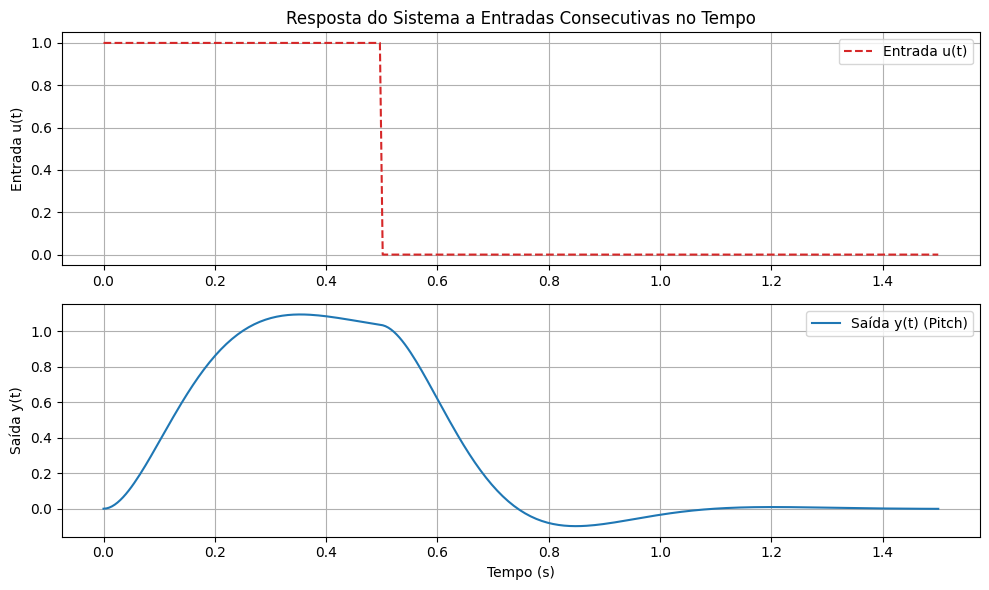

In [13]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt

# 1. DEFINIÇÃO DO SISTEMA (a partir do seu script)
w = 11.11
z = 0.6
num = [w**2]
den = [1, 2*z*w, w**2]

pitch_tf = ct.tf(num, den)
pitch = pitch_tf.to_ss()
print("Sistema em Espaço de Estados (pitch):")
print(pitch)

# 2. DEFINIÇÃO DOS VETORES DE TEMPO E ENTRADA

# Vetor de Tempo (T): De 0 a 1.5 segundos, com 300 pontos
T_final = 1.5
pontos = 300
T = np.linspace(0, T_final, pontos)

# Vetor de Entrada (U): Define a entrada consecutivo/arbitrária
U = np.zeros_like(T)

# Exemplo de entrada consecutivo:
# Entrada u(t) = 1.0 (degrau) para 0 <= t <= 0.5 s
tempo_mudanca = 0.5
U[T <= tempo_mudanca] = 1.0 

# O restante do tempo (t > 0.5 s) a entrada é zero (U = 0.0), 
# simulando a desativação da entrada ou um pulso.

# 3. EXECUÇÃO DA SIMULAÇÃO

# Condições iniciais (X0): assumindo que o sistema começa no repouso (estados zerados)
X0 = np.array([[0.], [0.]]) # É um sistema de 2ª ordem, então tem 2 estados (x1 e x2)

# Simular o sistema
# Retorna T_out (tempo), yout (saídas), xout (estados)
T_out, yout = ct.forced_response(pitch, T, U, X0)

# 4. VISUALIZAÇÃO DOS RESULTADOS

plt.figure(figsize=(10, 6))

# Plot da Entrada u(t)
plt.subplot(2, 1, 1)
plt.plot(T, U, label='Entrada u(t)', color='tab:red', linestyle='--')
plt.title('Resposta do Sistema a Entradas Consecutivas no Tempo')
plt.ylabel('Entrada u(t)')
plt.grid(True)
plt.legend()

# Plot da Saída y(t)
plt.subplot(2, 1, 2)
plt.plot(T_out, yout, label='Saída y(t) (Pitch)', color='tab:blue')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída y(t)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Sistema Contínuo (pitch_c):
<StateSpace>: sys[10]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (2): ['x[0]', 'x[1]']

A = [[ -13.332  -123.4321]
     [   1.        0.    ]]

B = [[1.]
     [0.]]

C = [[  0.     123.4321]]

D = [[0.]]

Sistema Discreto (pitch_d) com dt = 0.01s:
<StateSpace>: sys[10]$sampled
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (2): ['x[0]', 'x[1]']
dt = 0.01

A = [[ 0.8695413  -1.1532039 ]
     [ 0.00934282  0.99409978]]

B = [[9.34282003e-03]
     [4.78013711e-05]]

C = [[  0.     123.4321]]

D = [[0.]]


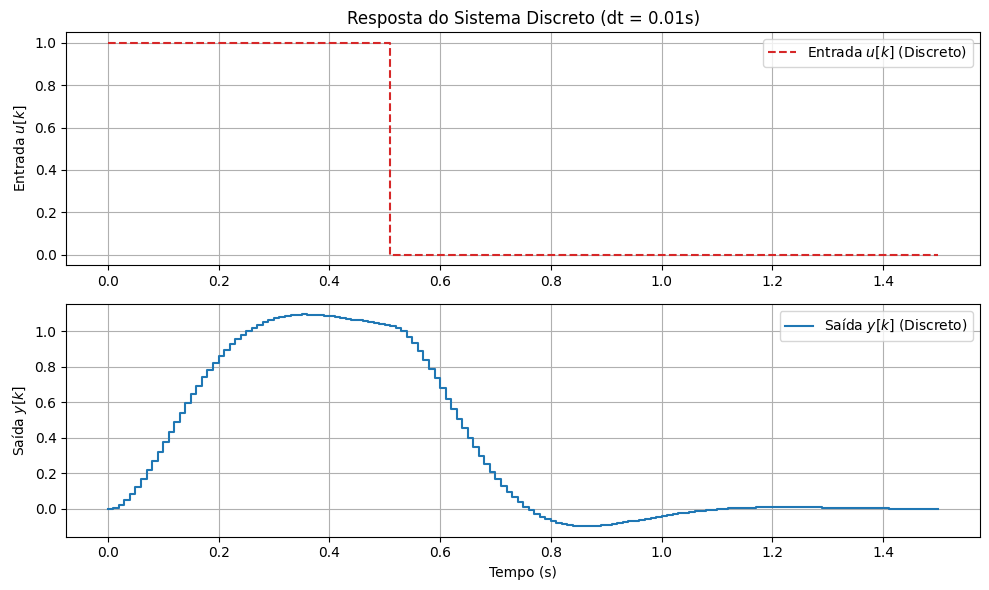

In [7]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt

# ---------------------------------------------------------------------
# 1. DEFINIÇÃO DO SISTEMA EM TEMPO CONTÍNUO (Original)
# ---------------------------------------------------------------------
w = 11.11
z = 0.6
num = [w**2]
den = [1, 2*z*w, w**2]

pitch_tf = ct.tf(num, den)
pitch_c = pitch_tf.to_ss() # Renomeado para pitch_c (contínuo)
print("Sistema Contínuo (pitch_c):")
print(pitch_c)

# ---------------------------------------------------------------------
# 2. DISCRETIZAÇÃO DO SISTEMA
# ---------------------------------------------------------------------

# Definir o passo de tempo de amostragem (dt)
# O dt deve ser menor que o período natural do sistema (1/w) e menor que o passo de T.
dt = 0.01 

# Converter o sistema contínuo (pitch_c) para discreto (pitch_d)
# Método 'zoh' (Zero-Order Hold) é o mais comum para simulação discreta de controladores.
pitch_d = ct.c2d(pitch_c, dt, method='zoh')
print("\nSistema Discreto (pitch_d) com dt = 0.01s:")
print(pitch_d)

# ---------------------------------------------------------------------
# 3. DEFINIÇÃO DOS VETORES DE TEMPO E ENTRADA
# ---------------------------------------------------------------------

# Vetor de Tempo (T): Usamos o dt do sistema discreto
T_final = 1.5
T_d = np.arange(0, T_final + dt, dt) 

# Se necessário, ajustamos o número de pontos para que T e U sejam compatíveis
pontos = len(T_d)
if T_d[-1] > T_final: # Correção de arredondamento
    T_d = T_d[:-1] 

# Recriar o Vetor de Entrada (U) no tempo discreto (ZOH)
U_d = np.zeros_like(T_d)

# Exemplo de entrada (o pulso de 1.0 de 0 a 0.5s)
tempo_mudanca = 0.5
U_d[T_d <= tempo_mudanca] = 1.0 

# Condições iniciais (2 estados zerados)
# Usando o formato 1D para evitar o erro de 'unpack'
X0 = np.array([0., 0.]) 

# ---------------------------------------------------------------------
# 4. EXECUÇÃO DA SIMULAÇÃO (Aplicando o FORCED_RESPONSE ao sistema discreto)
# ---------------------------------------------------------------------
# Ao aplicar forced_response a um sistema discreto, a simulação retorna
# a resposta amostragem por amostragem.
T_out_d, yout_d = ct.forced_response(pitch_d, T_d, U_d, X0)

# ---------------------------------------------------------------------
# 5. VISUALIZAÇÃO DOS RESULTADOS
# ---------------------------------------------------------------------

plt.figure(figsize=(10, 6))

# Plot da Entrada u(t)
plt.subplot(2, 1, 1)
# Usamos o estilo 'step' para indicar o comportamento ZOH da entrada discreta
plt.step(T_d, U_d, where='post', label='Entrada $u[k]$ (Discreto)', color='tab:red', linestyle='--')
plt.title(f'Resposta do Sistema Discreto (dt = {dt}s)')
plt.ylabel('Entrada $u[k]$')
plt.grid(True)
plt.legend()

# Plot da Saída y(t)
plt.subplot(2, 1, 2)
# Usamos 'step' para a saída, pois a simulação discreta fornece a resposta em pontos discretos
plt.step(T_out_d, yout_d, where='post', label='Saída $y[k]$ (Discreto)', color='tab:blue')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída $y[k]$')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt

# ---------------------------------------------------------------------
# 1. DEFINIÇÃO DO SISTEMA EM TEMPO CONTÍNUO (Original)
# ---------------------------------------------------------------------
w = 11.11
z = 0.6
num = [w**2]
den = [1, 2*z*w, w**2]

pitch_tf = ct.tf(num, den)
pitch_c = pitch_tf.to_ss() # Renomeado para pitch_c (contínuo)


# ---------------------------------------------------------------------
# 2. DISCRETIZAÇÃO DO SISTEMA
# ---------------------------------------------------------------------

# Definir o passo de tempo de amostragem (dt)
dt = 0.01 

# Converter o sistema contínuo (pitch_c) para discreto (pitch_d)
pitch_d = ct.c2d(pitch_c, dt, method='zoh')


# ---------------------------------------------------------------------
# 3. DEFINIÇÃO DOS VETORES DE TEMPO E ENTRADA
# ---------------------------------------------------------------------

# Vetor de Tempo (T): Usamos o dt do sistema discreto
T_final = 1.5
T_d = np.arange(0, T_final, dt)  # Ajuste para garantir que o tempo final seja múltiplo de dt

# Recriar o Vetor de Entrada (U) no tempo discreto (ZOH)
U_d = np.zeros_like(T_d)

# Exemplo de entrada (o pulso de 1.0 de 0 a 0.5s)
tempo_mudanca = 0.5
U_d[T_d <= tempo_mudanca] = 1.0 

# Condições iniciais (2 estados zerados)
X0 = np.array([0., 0.]) 




In [15]:
# ---------------------------------------------------------------------
# 4. EXECUÇÃO DA SIMULAÇÃO (Aplicando a função para todo o vetor de entrada)
# ---------------------------------------------------------------------
# Simulação usando o vetor completo de entradas
T_out_d, yout_d = ct.forced_response(pitch_d, T=T_d[:2], U=U_d[:2], X0=X0)


Sistema em Espaço de Estados (gtc):
<StateSpace>: sys[27]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (1): ['x[0]']

A = [[-50.]]

B = [[1.]]

C = [[50.]]

D = [[0.]]


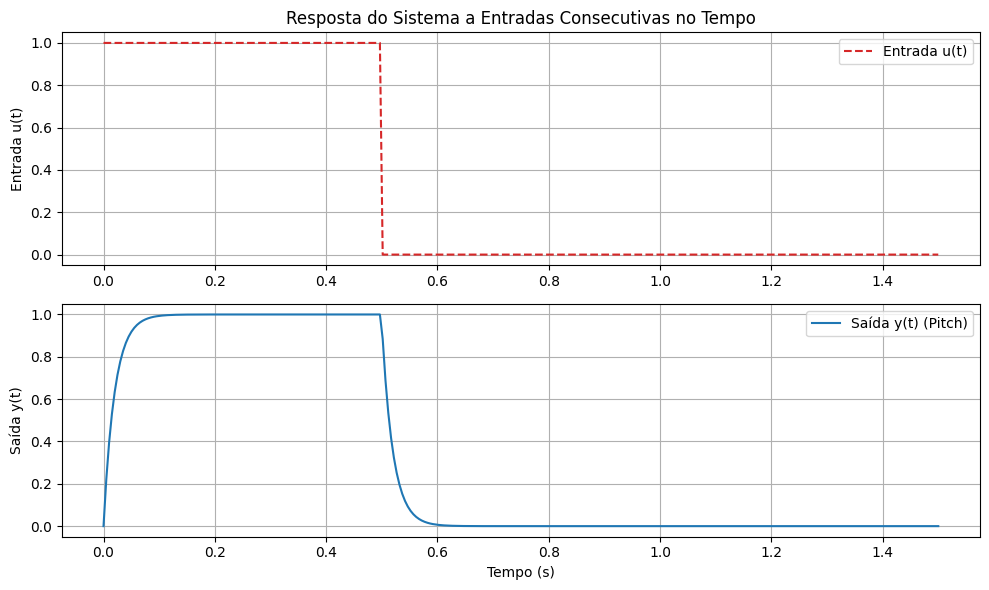

In [16]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt

# 1. DEFINIÇÃO DO SISTEMA (a partir do seu script)
a = 50

num = [a]
den = [1, a]

gtc_tf = ct.tf(num, den)
gtc = gtc_tf.to_ss()
print("Sistema em Espaço de Estados (gtc):")
print(gtc)

# 2. DEFINIÇÃO DOS VETORES DE TEMPO E ENTRADA

# Vetor de Tempo (T): De 0 a 1.5 segundos, com 300 pontos
T_final = 1.5
pontos = 300
T = np.linspace(0, T_final, pontos)

# Vetor de Entrada (U): Define a entrada consecutivo/arbitrária
U = np.zeros_like(T)

# Exemplo de entrada consecutivo:
# Entrada u(t) = 1.0 (degrau) para 0 <= t <= 0.5 s
tempo_mudanca = 0.5
U[T <= tempo_mudanca] = 1.0 

# O restante do tempo (t > 0.5 s) a entrada é zero (U = 0.0), 
# simulando a desativação da entrada ou um pulso.

# 3. EXECUÇÃO DA SIMULAÇÃO

# Condições iniciais (X0): assumindo que o sistema começa no repouso (estados zerados)
X0 = np.array([[0.]]) # É um sistema de 2ª ordem, então tem 2 estados (x1 e x2)

# Simular o sistema
# Retorna T_out (tempo), yout (saídas), xout (estados)
T_out, yout = ct.forced_response(gtc, T, U, X0)

# 4. VISUALIZAÇÃO DOS RESULTADOS

plt.figure(figsize=(10, 6))

# Plot da Entrada u(t)
plt.subplot(2, 1, 1)
plt.plot(T, U, label='Entrada u(t)', color='tab:red', linestyle='--')
plt.title('Resposta do Sistema a Entradas Consecutivas no Tempo')
plt.ylabel('Entrada u(t)')
plt.grid(True)
plt.legend()

# Plot da Saída y(t)
plt.subplot(2, 1, 2)
plt.plot(T_out, yout, label='Saída y(t) (Pitch)', color='tab:blue')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída y(t)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Sistema Contínuo (pitch_c):
<StateSpace>: sys[44]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (1): ['x[0]']

A = [[-50.]]

B = [[1.]]

C = [[50.]]

D = [[0.]]

Sistema Discreto (pitch_d) com dt = 0.01s:
<StateSpace>: sys[44]$sampled
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (1): ['x[0]']
dt = 1

A = [[1.92874985e-22]]

B = [[0.02]]

C = [[50.]]

D = [[0.]]


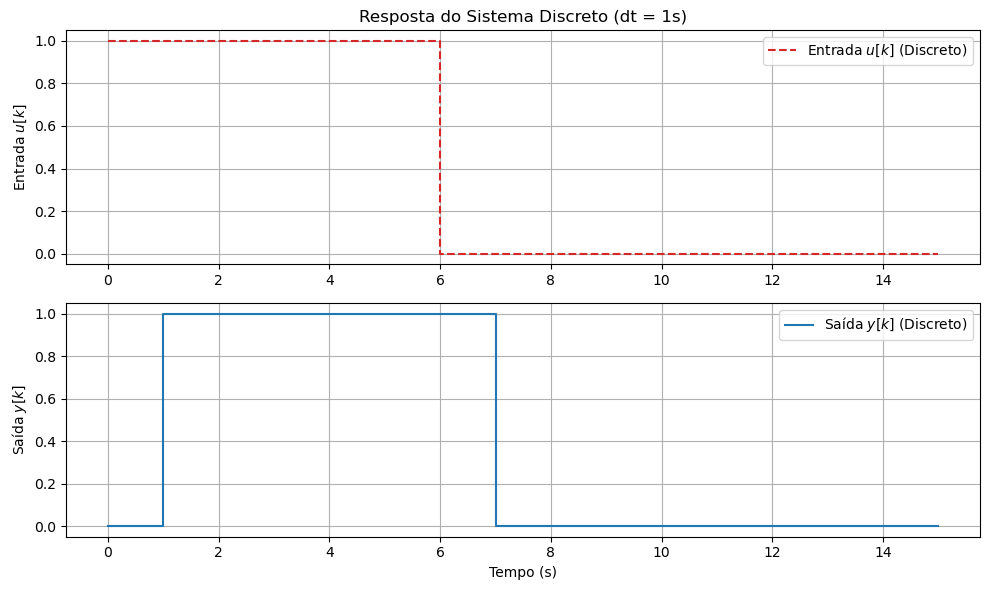

In [21]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt

# ---------------------------------------------------------------------
# 1. DEFINIÇÃO DO SISTEMA EM TEMPO CONTÍNUO (Original)
# ---------------------------------------------------------------------
a = 50
num = [a]
den = [1, a]

pitch_tf = ct.tf(num, den)
pitch_c = pitch_tf.to_ss() # Renomeado para pitch_c (contínuo)
print("Sistema Contínuo (pitch_c):")
print(pitch_c)

# ---------------------------------------------------------------------
# 2. DISCRETIZAÇÃO DO SISTEMA
# ---------------------------------------------------------------------

# Definir o passo de tempo de amostragem (dt)
# O dt deve ser menor que o período natural do sistema (1/w) e menor que o passo de T.
dt = 1

# Converter o sistema contínuo (pitch_c) para discreto (pitch_d)
# Método 'zoh' (Zero-Order Hold) é o mais comum para simulação discreta de controladores.
pitch_d = ct.c2d(pitch_c, dt, method='zoh')
print("\nSistema Discreto (pitch_d) com dt = 0.01s:")
print(pitch_d)

# ---------------------------------------------------------------------
# 3. DEFINIÇÃO DOS VETORES DE TEMPO E ENTRADA
# ---------------------------------------------------------------------

# Vetor de Tempo (T): Usamos o dt do sistema discreto
T_final = 15
T_d = np.arange(0, T_final + dt, dt) 

# Se necessário, ajustamos o número de pontos para que T e U sejam compatíveis
pontos = len(T_d)
if T_d[-1] > T_final: # Correção de arredondamento
    T_d = T_d[:-1] 

# Recriar o Vetor de Entrada (U) no tempo discreto (ZOH)
U_d = np.zeros_like(T_d)

# Exemplo de entrada (o pulso de 1.0 de 0 a 0.5s)
tempo_mudanca = 5
U_d[T_d <= tempo_mudanca] = 1.0 

# Condições iniciais (2 estados zerados)
# Usando o formato 1D para evitar o erro de 'unpack'
X0 = np.array([0.]) 

# ---------------------------------------------------------------------
# 4. EXECUÇÃO DA SIMULAÇÃO (Aplicando o FORCED_RESPONSE ao sistema discreto)
# ---------------------------------------------------------------------
# Ao aplicar forced_response a um sistema discreto, a simulação retorna
# a resposta amostragem por amostragem.
T_out_d, yout_d = ct.forced_response(pitch_d, T_d, U_d, X0)

# ---------------------------------------------------------------------
# 5. VISUALIZAÇÃO DOS RESULTADOS
# ---------------------------------------------------------------------

plt.figure(figsize=(10, 6))

# Plot da Entrada u(t)
plt.subplot(2, 1, 1)
# Usamos o estilo 'step' para indicar o comportamento ZOH da entrada discreta
plt.step(T_d, U_d, where='post', label='Entrada $u[k]$ (Discreto)', color='tab:red', linestyle='--')
plt.title(f'Resposta do Sistema Discreto (dt = {dt}s)')
plt.ylabel('Entrada $u[k]$')
plt.grid(True)
plt.legend()

# Plot da Saída y(t)
plt.subplot(2, 1, 2)
# Usamos 'step' para a saída, pois a simulação discreta fornece a resposta em pontos discretos
plt.step(T_out_d, yout_d, where='post', label='Saída $y[k]$ (Discreto)', color='tab:blue')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída $y[k]$')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Sistema em Espaço de Estados (3 estados, 2 entradas):
<StateSpace>: sys[1]
Inputs (2): ['u[0]', 'u[1]']
Outputs (3): ['y[0]', 'y[1]', 'y[2]']
States (3): ['x[0]', 'x[1]', 'x[2]']

A = [[-0.75   0.05  -2.5  ]
     [ 0.09  -0.209  0.45 ]
     [ 1.    -0.1    0.   ]]

B = [[ 0.5  0. ]
     [ 0.  -1. ]
     [ 0.   0. ]]

C = [[1. 0. 0.]
     [0. 1. 0.]
     [0. 0. 1.]]

D = [[0. 0.]
     [0. 0.]
     [0. 0.]]


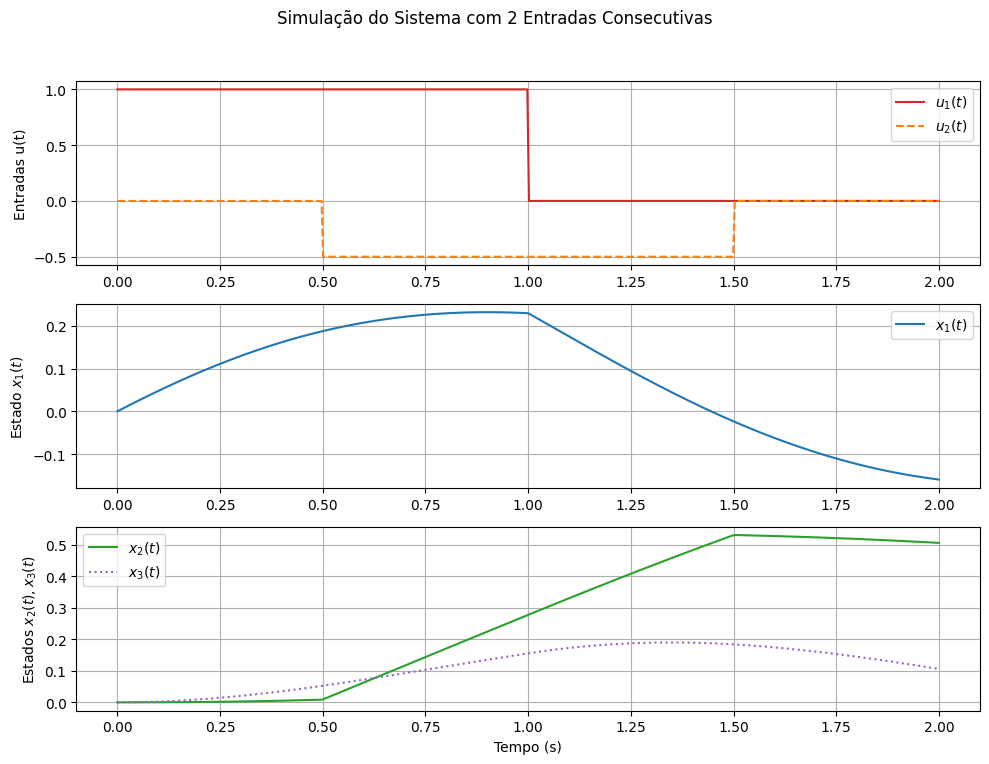

In [2]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt

# 1. DEFINIÇÃO DOS PARÂMETROS (Valores Fictícios para Exemplo)
# Nota: Você deve substituir estes valores pelos seus parâmetros reais.
class Parameters:
    def __init__(self):
        self.B_dt = 1.0  # Coeficiente de amortecimento
        self.B_r = 0.5
        self.J_r = 2.0   # Momento de inércia
        self.N_g = 10.0  # Relação de engrenagem
        self.K_dt = 5.0  # Rigidez
        self.ETA_dt = 0.9 # Eficiência
        self.J_g = 1.0
        self.B_g = 0.2
        self.OMEGA_n = 10.0 # Frequência natural
        self.ZETA = 0.1     # Fator de amortecimento

params = Parameters()

# 2. CONSTRUÇÃO DAS MATRIZES A e B
A11 = -(params.B_dt + params.B_r) / params.J_r
A12 = params.B_dt / (params.N_g * params.J_r)
A13 = -params.K_dt / params.J_r
A21 = (params.B_dt * params.ETA_dt) / (params.N_g * params.J_g)
A22 = -(((params.B_dt * params.ETA_dt) / (params.N_g**2)) + params.B_g) * (1 / params.J_g)
A23 = (params.K_dt * params.ETA_dt) / (params.N_g * params.J_g)
A32 = -1 / params.N_g
# A54 e A55 são ignorados pois seu sistema A é 3x3 e não 5x5
# Nota: O sistema que você definiu A é 3x3. Se o original for 5x5, você precisa expandir A e B.

B11 = 1 / params.J_r
B22 = -1 / params.J_g
# B53 é ignorado

# Matriz A (3x3)
A = np.array([
    [A11, A12, A13],
    [A21, A22, A23],
    [1.0, A32, 0.0]
])

# Matriz B (3x2)
B = np.array([
    [B11, 0.0],
    [0.0, B22],
    [0.0, 0.0]
])

# 3. DEFINIÇÃO DAS MATRIZES C e D (Saída)

# Matriz C (3x3): Saída = Estados (Monitoramos todos os 3 estados)
C = np.eye(3) 

# Matriz D (3x2): Sem alimentação direta da entrada para a saída
D = np.zeros((3, 2))

# Criar o objeto de sistema em espaço de estados
sys = ct.ss(A, B, C, D)
print("Sistema em Espaço de Estados (3 estados, 2 entradas):")
print(sys)

# 4. SIMULAÇÃO COM ENTRADAS CONSECUTIVAS

# Vetor de Tempo
T_final = 2.0
T = np.linspace(0, T_final, 500)

# Vetor de Entrada U: Precisa ser uma matriz com 2 colunas (2 entradas), shape (len(T), 2)
U = np.zeros((len(T), 2))

# Definindo as Entradas Consecutivas:

# Entrada 1 (u1): Degrau de 1 unidade de t=0 a t=1.0s
U[T <= 1.0, 0] = 1.0 

# Entrada 2 (u2): Degrau de -0.5 unidade de t=0.5 a t=1.5s
U[(T >= 0.5) & (T <= 1.5), 1] = -0.5

# Condições iniciais (3 estados zerados)
X0 = np.array([0., 0., 0.]) 

# Simular: capturar apenas T e yout, como discutido na resposta anterior
T_out, yout = ct.forced_response(sys, T, U.T, X0)

# 5. VISUALIZAÇÃO DOS RESULTADOS

fig, axes = plt.subplots(3, 1, figsize=(10, 8))
fig.suptitle('Simulação do Sistema com 2 Entradas Consecutivas')

# Plot das Entradas
axes[0].plot(T, U[:, 0], label='$u_1(t)$', color='tab:red')
axes[0].plot(T, U[:, 1], label='$u_2(t)$', color='tab:orange', linestyle='--')
axes[0].set_ylabel('Entradas u(t)')
axes[0].grid()
axes[0].legend()

# Plot das Saídas (Estados)
axes[1].plot(T_out, yout[0], label='$x_1(t)$', color='tab:blue')
axes[1].set_ylabel('Estado $x_1(t)$')
axes[1].grid()
axes[1].legend()

axes[2].plot(T_out, yout[1], label='$x_2(t)$', color='tab:green')
axes[2].plot(T_out, yout[2], label='$x_3(t)$', color='tab:purple', linestyle=':')
axes[2].set_xlabel('Tempo (s)')
axes[2].set_ylabel('Estados $x_2(t), x_3(t)$')
axes[2].grid()
axes[2].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Iniciando simulação com 200 passos de 0.01s...
Simulação concluída.


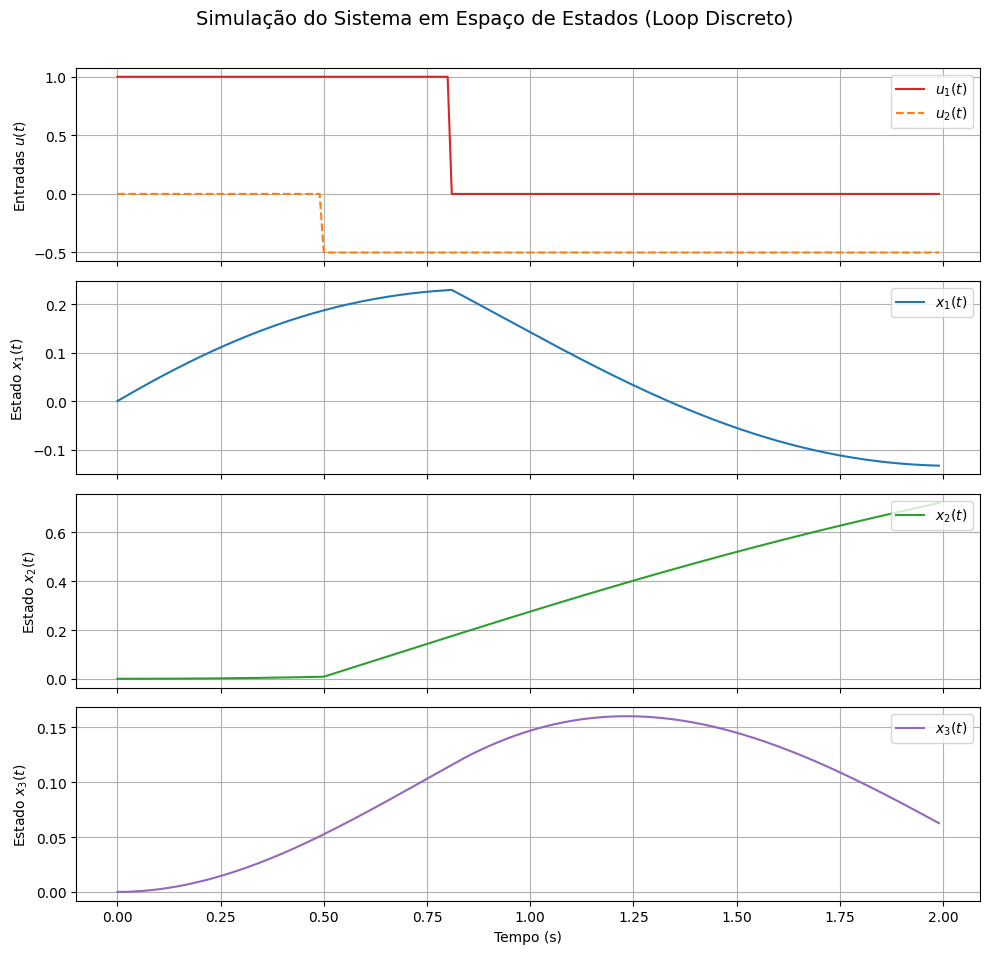

In [29]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt

# ---------------------------------------------------------------------
# 1. DEFINIÇÃO DOS PARÂMETROS E MATRIZES
# (Valores Fictícios - SUBSTITUA PELOS SEUS VALORES REAIS)
# ---------------------------------------------------------------------
class Parameters:
    def __init__(self):
        # Parâmetros Mecânicos e de Controle (Exemplo)
        self.B_dt = 1.0  
        self.B_r = 0.5
        self.J_r = 2.0   
        self.N_g = 10.0  
        self.K_dt = 5.0  
        self.ETA_dt = 0.9 
        self.J_g = 1.0
        self.B_g = 0.2
        self.OMEGA_n = 10.0 
        self.ZETA = 0.1     

params = Parameters()

# Cálculo dos coeficientes da Matriz A
A11 = -(params.B_dt + params.B_r) / params.J_r
A12 = params.B_dt / (params.N_g * params.J_r)
A13 = -params.K_dt / params.J_r
A21 = (params.B_dt * params.ETA_dt) / (params.N_g * params.J_g)
A22 = -(((params.B_dt * params.ETA_dt) / (params.N_g**2)) + params.B_g) * (1 / params.J_g)
A23 = (params.K_dt * params.ETA_dt) / (params.N_g * params.J_g)
A32 = -1 / params.N_g

# Matriz A (3x3)
A = np.array([
    [A11, A12, A13],
    [A21, A22, A23],
    [1.0, A32, 0.0]
])

# Cálculo dos coeficientes da Matriz B
B11 = 1 / params.J_r
B22 = -1 / params.J_g

# Matriz B (3x2)
B = np.array([
    [B11, 0.0],
    [0.0, B22],
    [0.0, 0.0]
])

# Matrizes C e D (Saída = Estados: monitoramos todos os 3 estados)
C = np.eye(3) 
D = np.zeros((3, 2))

# Sistema em Tempo Contínuo
sys_c = ct.ss(A, B, C, D)

# ---------------------------------------------------------------------
# 2. DISCRETIZAÇÃO DO SISTEMA E INICIALIZAÇÃO
# ---------------------------------------------------------------------
dt = 0.01          # Passo de tempo de amostragem (s)
T_final = 2.0      # Tempo total de simulação (s)
N_passos = int(T_final / dt)

# Discretizar o sistema de tempo contínuo para uso no loop
sys_d = ct.c2d(sys_c, dt, method='zoh')
G = sys_d.A # Matriz de Propagação de Estado (A discreta)
H = sys_d.B # Matriz de Entrada (B discreta)

# Inicialização dos vetores de armazenamento (CORREÇÃO DE ATRIBUTO)
t_hist = np.zeros(N_passos)
x_hist = np.zeros((sys_c.nstates, N_passos)) # Corrigido para .nstates
u_hist = np.zeros((sys_c.ninputs, N_passos)) # Corrigido para .ninputs

# Condições iniciais
x_k = np.array([0., 0., 0.]) # Estado inicial (x[0])

# ---------------------------------------------------------------------
# 3. LOOP DE SIMULAÇÃO COM ENTRADAS CALCULADAS CONSECUTIVAMENTE
# ---------------------------------------------------------------------
print(f"Iniciando simulação com {N_passos} passos de {dt}s...")

for k in range(N_passos):
    
    # 3.1. Armazenar o estado e o tempo atual
    tempo_atual = k * dt
    t_hist[k] = tempo_atual
    x_hist[:, k] = x_k
    
    # 3.2. CÁLCULO DAS ENTRADAS CONSECUTIVAS (u1[k] e u2[k])
    # ***************************************************************
    # ESTA É A SEÇÃO ONDE SUAS EQUAÇÕES DE ENTRADA/CONTROLE DEVEM SER INSERIDAS
    # ***************************************************************
    u_k = np.array([0., 0.]) 
    
    # Exemplo de lógica de entrada (u1: pulso, u2: degrau atrasado)
    if tempo_atual >= 0.0 and tempo_atual <= 0.8:
        u_k[0] = 1.0 # Entrada u1(t) é 1.0
    else:
        u_k[0] = 0.0 # Entrada u1(t) é 0.0
        
    if tempo_atual >= 0.5:
        u_k[1] = -0.5 # Entrada u2(t) é -0.5
    else:
        u_k[1] = 0.0
        
    # 3.3. Armazenar a entrada calculada
    u_hist[:, k] = u_k
    
    # 3.4. PROPAGAR O ESTADO (x[k+1] = Gx[k] + Hu[k])
    # Note que a Saída y[k] não é estritamente necessária aqui, mas se
    # fosse usada para calcular a entrada (laço fechado), seria calculada
    # antes desta linha: y_k = C @ x_k + D @ u_k
    x_k_plus_1 = G @ x_k + H @ u_k
    
    # 3.5. Atualizar o estado para a próxima iteração
    x_k = x_k_plus_1

print("Simulação concluída.")
# Transpor os históricos de estado e entrada para facilitar a plotagem (Tempo nas linhas)
x_hist_T = x_hist.T
u_hist_T = u_hist.T

# ---------------------------------------------------------------------
# 4. PLOTAGEM DOS RESULTADOS
# ---------------------------------------------------------------------

fig, axes = plt.subplots(4, 1, figsize=(10, 10), sharex=True)
fig.suptitle('Simulação do Sistema em Espaço de Estados (Loop Discreto)', fontsize=14)

# Plot 1: Entradas u1(t) e u2(t)
axes[0].plot(t_hist, u_hist_T[:, 0], label='$u_1(t)$', color='tab:red')
axes[0].plot(t_hist, u_hist_T[:, 1], label='$u_2(t)$', color='tab:orange', linestyle='--')
axes[0].set_ylabel('Entradas $u(t)$')
axes[0].grid(True)
axes[0].legend(loc='upper right')

# Plot 2: Estado x1(t)
axes[1].plot(t_hist, x_hist_T[:, 0], label='$x_1(t)$', color='tab:blue')
axes[1].set_ylabel('Estado $x_1(t)$')
axes[1].grid(True)
axes[1].legend(loc='upper right')

# Plot 3: Estado x2(t)
axes[2].plot(t_hist, x_hist_T[:, 1], label='$x_2(t)$', color='tab:green')
axes[2].set_ylabel('Estado $x_2(t)$')
axes[2].grid(True)
axes[2].legend(loc='upper right')

# Plot 4: Estado x3(t)
axes[3].plot(t_hist, x_hist_T[:, 2], label='$x_3(t)$', color='tab:purple')
axes[3].set_xlabel('Tempo (s)')
axes[3].set_ylabel('Estado $x_3(t)$')
axes[3].grid(True)
axes[3].legend(loc='upper right')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

In [25]:
import pandas as pd
import numpy as np
path = r'Datasets/WindSpeed_V1.csv'
df = pd.read_csv(path)  
v = df.iloc[:,0].values + 1
v = np.sqrt(np.flip(v) )*4*1.5

def Cp_calc(LAMBDA=0, PHI=0):
    PHI = PHI*180/np.pi
    path = r'TSRxCPxPSI.csv'
    df = pd.read_csv(path)
    angles = np.arange(-5,6,1)
    TSR = df.iloc[:,0]
    diff1 = np.abs(TSR - LAMBDA)
    diff2 = np.abs(angles - PHI)
    id1 = np.argmin(diff1)
    id2 = np.argmin(diff2)+1

    return df.iloc[id1,id2]

def Calculate_TAU_r(OMEGA_r, v, PHI=0):
        
        Area = (57.5**2)*np.pi
        R = 57.5
        RHO = 1.225
        
        LAMBDA = OMEGA_r*R/v
        C_p = Cp_calc(LAMBDA, PHI)
        TAU = RHO*Area*C_p*(v**3)/(2*OMEGA_r)
        return TAU

def Calculate_TAU_g(OMEGA_g, u_k=0, PHI=0):
        
        Area = (57.5**2)*np.pi
        R = 57.5
        RHO = 1.225
        LAMBDA_opt = 7.6
        LAMBDA = LAMBDA_opt + u_k
        N_g = 1
        ETA_gc=1
        
        C_p = Cp_calc(LAMBDA,PHI)
        K_mppt = RHO*Area*(R**3)*C_p/(2*(LAMBDA**3))
        TAU = K_mppt*(OMEGA_g**2)/(N_g**2)
        P_g = ETA_gc*OMEGA_g*TAU

In [36]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt

# ---------------------------------------------------------------------
# 1. DEFINIÇÃO DOS PARÂMETROS E MATRIZES
# (Valores Fictícios - SUBSTITUA PELOS SEUS VALORES REAIS)
# ---------------------------------------------------------------------
class Parameters:
    def __init__(self):
        # Parâmetros Mecânicos e de Controle (Exemplo)
        self.B_dt = 1.0  
        self.B_r = 0.5
        self.J_r = 2.0   
        self.N_g = 1 
        self.K_dt = 5.0  
        self.ETA_dt = 0.9 
        self.J_g = 1.0
        self.B_g = 0.2
        self.OMEGA_n = 10.0 
        self.ZETA = 0.1     

params = Parameters()

# Cálculo dos coeficientes da Matriz A
A11 = -(params.B_dt + params.B_r) / params.J_r
A12 = params.B_dt / (params.N_g * params.J_r)
A13 = -params.K_dt / params.J_r
A21 = (params.B_dt * params.ETA_dt) / (params.N_g * params.J_g)
A22 = -(((params.B_dt * params.ETA_dt) / (params.N_g**2)) + params.B_g) * (1 / params.J_g)
A23 = (params.K_dt * params.ETA_dt) / (params.N_g * params.J_g)
A32 = -1 / params.N_g

# Matriz A (3x3)
A = np.array([
    [A11, A12, A13],
    [A21, A22, A23],
    [1.0, A32, 0.0]
])

# Cálculo dos coeficientes da Matriz B
B11 = 1 / params.J_r
B22 = -1 / params.J_g

# Matriz B (3x2)
B = np.array([
    [B11, 0.0],
    [0.0, B22],
    [0.0, 0.0]
])

# Matrizes C e D (Saída = Estados: monitoramos todos os 3 estados)
C = np.eye(3) 
D = np.zeros((3, 2))

# Sistema em Tempo Contínuo
sys_c = ct.ss(A, B, C, D)

# ---------------------------------------------------------------------
# 2. DISCRETIZAÇÃO DO SISTEMA E INICIALIZAÇÃO
# ---------------------------------------------------------------------
v1 = v[:1000]
dt = 1          # Passo de tempo de amostragem (s)
T_final = len(v1)      # Tempo total de simulação (s)
N_passos = int(T_final / dt)

# Discretizar o sistema de tempo contínuo para uso no loop
# Discretizar o sistema de tempo contínuo para uso no loop
sys_d = ct.c2d(sys_c, dt, method='zoh')
G = sys_d.A # Matriz de Propagação de Estado (A discreta)
H = sys_d.B # Matriz de Entrada (B discreta)

# Inicialização dos vetores de armazenamento (CORREÇÃO DE ATRIBUTO)
t_hist = np.zeros(N_passos)
x_hist = np.zeros((sys_c.nstates, N_passos)) # Corrigido para .nstates
u_hist = np.zeros((sys_c.ninputs, N_passos)) # Corrigido para .ninputs

# Condições iniciais
x_k = np.array([0.1, 0.1, 0.]) # Estado inicial (x[0])

# ---------------------------------------------------------------------
# 3. LOOP DE SIMULAÇÃO COM ENTRADAS CALCULADAS CONSECUTIVAMENTE
# ---------------------------------------------------------------------
print(f"Iniciando simulação com {N_passos} passos de {dt}s...")

for k in range(N_passos):
    
    # 3.1. Armazenar o estado e o tempo atual
   
    t_hist[k] = tempo_atual
    x_hist[:, k] = x_k
    
    # 3.2. CÁLCULO DAS ENTRADAS CONSECUTIVAS (u1[k] e u2[k])
    # ***************************************************************
    # ESTA É A SEÇÃO ONDE SUAS EQUAÇÕES DE ENTRADA/CONTROLE DEVEM SER INSERIDAS
    # ***************************************************************
    u_k = np.array([0.001, 0.001]) 
    
    u_k[0] = Calculate_TAU_r(x_k[0],v1[k])
    u_k[1] = Calculate_TAU_g(x_k[1])
        
    # 3.3. Armazenar a entrada calculada
    u_hist[:, k] = u_k
    
    # 3.4. PROPAGAR O ESTADO (x[k+1] = Gx[k] + Hu[k])
    # Note que a Saída y[k] não é estritamente necessária aqui, mas se
    # fosse usada para calcular a entrada (laço fechado), seria calculada
    # antes desta linha: y_k = C @ x_k + D @ u_k
    x_k_plus_1 = G @ x_k + H @ u_k
    
    # 3.5. Atualizar o estado para a próxima iteração
    x_k = x_k_plus_1

print("Simulação concluída.")
# Transpor os históricos de estado e entrada para facilitar a plotagem (Tempo nas linhas)
x_hist_T = x_hist.T
u_hist_T = u_hist.T

# ---------------------------------------------------------------------
# 4. PLOTAGEM DOS RESULTADOS
# ---------------------------------------------------------------------

fig, axes = plt.subplots(4, 1, figsize=(10, 10), sharex=True)
fig.suptitle('Simulação do Sistema em Espaço de Estados (Loop Discreto)', fontsize=14)

# Plot 1: Entradas u1(t) e u2(t)
axes[0].plot(t_hist, u_hist_T[:, 0], label='$u_1(t)$', color='tab:red')
axes[0].plot(t_hist, u_hist_T[:, 1], label='$u_2(t)$', color='tab:orange', linestyle='--')
axes[0].set_ylabel('Entradas $u(t)$')
axes[0].grid(True)
axes[0].legend(loc='upper right')

# Plot 2: Estado x1(t)
axes[1].plot(t_hist, x_hist_T[:, 0], label='$x_1(t)$', color='tab:blue')
axes[1].set_ylabel('Estado $x_1(t)$')
axes[1].grid(True)
axes[1].legend(loc='upper right')

# Plot 3: Estado x2(t)
axes[2].plot(t_hist, x_hist_T[:, 1], label='$x_2(t)$', color='tab:green')
axes[2].set_ylabel('Estado $x_2(t)$')
axes[2].grid(True)
axes[2].legend(loc='upper right')

# Plot 4: Estado x3(t)
axes[3].plot(t_hist, x_hist_T[:, 2], label='$x_3(t)$', color='tab:purple')
axes[3].set_xlabel('Tempo (s)')
axes[3].set_ylabel('Estado $x_3(t)$')
axes[3].grid(True)
axes[3].legend(loc='upper right')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

Iniciando simulação com 1000 passos de 1s...


/tmp/ipykernel_477/2444475814.py:103: RuntimeWarning: overflow encountered in scalar power
  TAU = K_mppt*(OMEGA_g**2)/(N_g**2)
/tmp/ipykernel_477/915149214.py:109: RuntimeWarning: invalid value encountered in matmul
  x_k_plus_1 = G @ x_k + H @ u_k
/tmp/ipykernel_477/2444475814.py:242: SyntaxWarning: invalid escape sequence '\o'
  axes[1].plot(t_hist, x_hist_T[:, 0], label='$x_1(t)$ ($\omega_r$)', color='tab:blue')
/tmp/ipykernel_477/2444475814.py:248: SyntaxWarning: invalid escape sequence '\o'
  axes[2].plot(t_hist, x_hist_T[:, 1], label='$x_2(t)$ ($\omega_g$)', color='tab:green')


KeyboardInterrupt: 

Iniciando simulação com 1000 passos de 0.01s. Tempo total: 10.00s
Simulação concluída.


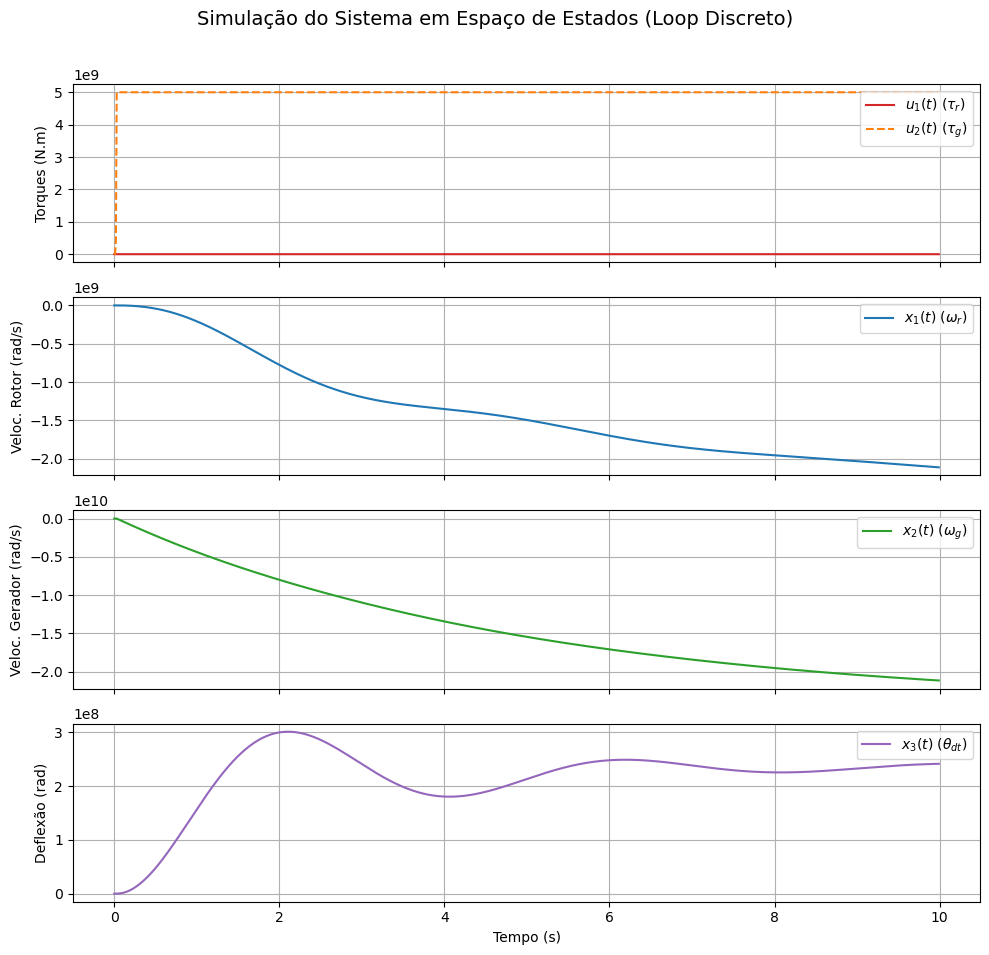

In [1]:
import pandas as pd
import numpy as np
import control as ct
import matplotlib.pyplot as plt

# ---------------------------------------------------------------------
# FUNÇÕES DE CÁLCULO EXTERNAS (TAU_r e TAU_g)
# ---------------------------------------------------------------------

# Configuração de dados de entrada (Simulação de CSV)
# OBS: O código assume que 'TSRxCPxPSI.csv' e 'Datasets/WindSpeed_V1.csv'
# estão disponíveis. Estou usando dados fictícios para 'v' caso não sejam encontrados.

# Simulando a leitura de dados de vento
try:
    path_v = r'Datasets/WindSpeed_V1.csv'
    df_v = pd.read_csv(path_v)  
    v = df_v.iloc[:,0].values + 1
    v = np.sqrt(np.flip(v) )*4*1.5
except FileNotFoundError:
    print("AVISO: 'Datasets/WindSpeed_V1.csv' não encontrado. Usando dados de vento simulados.")
    # Usando 1000 pontos para simulação
    v = np.linspace(8, 12, 1000) * (1 + 0.1 * np.sin(np.linspace(0, 100, 1000)))


def Cp_calc(LAMBDA=0, PHI=0):
    PHI = PHI * 180 / np.pi
    
    # Simulação da leitura de TSRxCPxPSI.csv
    try:
        path_cp = r'TSRxCPxPSI.csv'
        df = pd.read_csv(path_cp)
    except FileNotFoundError:
        # Usando dados fictícios para CP caso o arquivo não seja encontrado
        df = pd.DataFrame({
            'TSR': np.linspace(1, 12, 100),
            '-5': np.clip(np.sin(np.linspace(0, np.pi, 100) / 2) * 0.4, 0.05, 0.4),
            '0': np.clip(np.sin(np.linspace(0, np.pi, 100)) * 0.48, 0.05, 0.48),
            '5': np.clip(np.sin(np.linspace(0, np.pi, 100) * 1.5) * 0.35, 0.05, 0.35)
        })
        # print("AVISO: 'TSRxCPxPSI.csv' não encontrado. Usando dados de Cp simulados.")

    angles = np.arange(-5, 6, 1)
    TSR = df.iloc[:, 0]
    
    diff1 = np.abs(TSR - LAMBDA)
    diff2 = np.abs(angles - PHI)
    
    id1 = np.argmin(diff1.values)
    id2 = np.argmin(diff2) + 1 

    if id2 >= df.shape[1]:
         id2 = df.shape[1] - 1
         
    return df.iloc[id1, id2]


def Calculate_TAU_r(OMEGA_r, v, PHI=0):
    
    Area = (57.5**2)*np.pi
    R = 57.5
    RHO = 1.225
    
    # SEGURANÇA: Evita divisão por zero se a velocidade angular for muito baixa
    if OMEGA_r < 1e-6 or v == 0:
        return 0.0
        
    LAMBDA = OMEGA_r*R/v
    C_p = Cp_calc(LAMBDA, PHI)
    TAU = RHO*Area*C_p*(v**3)/(2*OMEGA_r)
    return TAU

# Usando N_g do objeto params para consistência
def Calculate_TAU_g(OMEGA_g, N_g, u_k=0, PHI=0):
        
    Area = (57.5**2)*np.pi
    R = 57.5
    RHO = 1.225
    LAMBDA_opt = 7.6
    
    LAMBDA = LAMBDA_opt + u_k 
    
    C_p = Cp_calc(LAMBDA,PHI)
    
    # Segue a formulação MPPT (Maximum Power Point Tracking)
    K_mppt = RHO*Area*(R**3)*C_p/(2*(LAMBDA**3))
    
    # SEGURANÇA: Evita divisão por zero se N_g ou LAMBDA forem zero
    if N_g == 0 or LAMBDA == 0:
        return 0.0
        
    TAU = K_mppt*(OMEGA_g**2)/(N_g**2)
    
    return TAU # Retorna o torque (TAU_g)


# ---------------------------------------------------------------------
# 1. DEFINIÇÃO DOS PARÂMETROS E MATRIZES
# ---------------------------------------------------------------------
class Parameters:
    def __init__(self):
        # Parâmetros Mecânicos e de Controle (Exemplo)
        self.B_dt = 1.0  
        self.B_r = 0.5
        self.J_r = 2.0   
        self.N_g = 10.0  
        self.K_dt = 5.0  
        self.ETA_dt = 0.9 
        self.J_g = 1.0
        self.B_g = 0.2
        self.OMEGA_n = 10.0 
        self.ZETA = 0.1     

params = Parameters()

# Cálculo dos coeficientes da Matriz A
A11 = -(params.B_dt + params.B_r) / params.J_r
A12 = params.B_dt / (params.N_g * params.J_r)
A13 = -params.K_dt / params.J_r
A21 = (params.B_dt * params.ETA_dt) / (params.N_g * params.J_g)
A22 = -(((params.B_dt * params.ETA_dt) / (params.N_g**2)) + params.B_g) * (1 / params.J_g)
A23 = (params.K_dt * params.ETA_dt) / (params.N_g * params.J_g)
A32 = -1 / params.N_g

# Matriz A (3x3)
A = np.array([
    [A11, A12, A13],
    [A21, A22, A23],
    [1.0, A32, 0.0]
])

# Cálculo dos coeficientes da Matriz B
B11 = 1 / params.J_r
B22 = -1 / params.J_g

# Matriz B (3x2)
B = np.array([
    [B11, 0.0],
    [0.0, B22],
    [0.0, 0.0]
])

# Matrizes C e D (Saída = Estados: monitoramos todos os 3 estados)
C = np.eye(3) 
D = np.zeros((3, 2))

# Sistema em Tempo Contínuo
sys_c = ct.ss(A, B, C, D)

# ---------------------------------------------------------------------
# 2. DISCRETIZAÇÃO DO SISTEMA E INICIALIZAÇÃO
# ---------------------------------------------------------------------

# Redimensionar o vetor de velocidade do vento (v) para 1000 pontos
v1 = v[:1000] 

# CORREÇÃO CRÍTICA: dt reduzido para evitar instabilidade numérica
dt = 0.01         # Passo de tempo de amostragem (s)

# N_passos é o número de amostras do vento, o tempo total é ajustado.
N_passos = len(v1) 
T_final = N_passos * dt # Tempo total de simulação (s)

# Discretizar o sistema de tempo contínuo para uso no loop
sys_d = ct.c2d(sys_c, dt, method='zoh')
G = sys_d.A 
H = sys_d.B 

# Inicialização dos vetores de armazenamento (usando .nstates e .ninputs)
t_hist = np.zeros(N_passos)
x_hist = np.zeros((sys_c.nstates, N_passos)) 
u_hist = np.zeros((sys_c.ninputs, N_passos)) 

# Condições iniciais
x_k = np.array([0.1, 0.1, 0.]) # Estado inicial (x[0])

# Limite físico máximo de torque para evitar overflow
MAX_TORQUE = 5000000000.0 

# ---------------------------------------------------------------------
# 3. LOOP DE SIMULAÇÃO COM ENTRADAS CALCULADAS CONSECUTIVAMENTE
# ---------------------------------------------------------------------
print(f"Iniciando simulação com {N_passos} passos de {dt}s. Tempo total: {T_final:.2f}s")

for k in range(N_passos):
    
    # 3.1. Armazenar o estado e o tempo atual
    tempo_atual = k * dt 
    t_hist[k] = tempo_atual
    x_hist[:, k] = x_k
    
    # 3.2. CÁLCULO DAS ENTRADAS CONSECUTIVAS (u1[k] e u2[k])
    
    # u_k[0] = Torque Aerodinâmico (TAU_r) - Entrada da turbina
    u_k_tau_r = Calculate_TAU_r(x_k[0], v1[k])
    
    # u_k[1] = Torque do Gerador (TAU_g) - Carga/Saída
    u_k_tau_g = Calculate_TAU_g(x_k[1], params.N_g)
    
    u_k = np.array([u_k_tau_r, u_k_tau_g])

    # LIMITAÇÃO FÍSICA DE TORQUE (Evita Overflow)
    u_k = np.clip(u_k, -MAX_TORQUE, MAX_TORQUE)
        
    # 3.3. Armazenar a entrada calculada
    u_hist[:, k] = u_k
    
    # 3.4. PROPAGAR O ESTADO (x[k+1] = Gx[k] + Hu[k])
    x_k_plus_1 = G @ x_k + H @ u_k
    
    # 3.5. Atualizar o estado para a próxima iteração
    x_k = x_k_plus_1

print("Simulação concluída.")

# Transpor os históricos de estado e entrada para facilitar a plotagem (Tempo nas linhas)
x_hist_T = x_hist.T
u_hist_T = u_hist.T

# ---------------------------------------------------------------------
# 4. PLOTAGEM DOS RESULTADOS
# ---------------------------------------------------------------------

fig, axes = plt.subplots(4, 1, figsize=(10, 10), sharex=True)
fig.suptitle('Simulação do Sistema em Espaço de Estados (Loop Discreto)', fontsize=14)

# Plot 1: Entradas u1(t) e u2(t)
axes[0].plot(t_hist, u_hist_T[:, 0], label=r'$u_1(t)$ ($\tau_r$)', color='tab:red') # Corrigido: raw string
axes[0].plot(t_hist, u_hist_T[:, 1], label=r'$u_2(t)$ ($\tau_g$)', color='tab:orange', linestyle='--') # Corrigido: raw string
axes[0].set_ylabel('Torques (N.m)')
axes[0].grid(True)
axes[0].legend(loc='upper right')

# Plot 2: Estado x1(t) - OMEGA_r
axes[1].plot(t_hist, x_hist_T[:, 0], label=r'$x_1(t)$ ($\omega_r$)', color='tab:blue') # Corrigido: raw string
axes[1].set_ylabel('Veloc. Rotor (rad/s)')
axes[1].grid(True)
axes[1].legend(loc='upper right')

# Plot 3: Estado x2(t) - OMEGA_g
axes[2].plot(t_hist, x_hist_T[:, 1], label=r'$x_2(t)$ ($\omega_g$)', color='tab:green') # Corrigido: raw string
axes[2].set_ylabel('Veloc. Gerador (rad/s)')
axes[2].grid(True)
axes[2].legend(loc='upper right')

# Plot 4: Estado x3(t) - THETA_dt
axes[3].plot(t_hist, x_hist_T[:, 2], label=r'$x_3(t)$ ($\theta_{dt}$)', color='tab:purple') # Corrigido: raw string
axes[3].set_xlabel('Tempo (s)')
axes[3].set_ylabel('Deflexão (rad)')
axes[3].grid(True)
axes[3].legend(loc='upper right')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()